In [2]:
import numpy as np
import sympy as sp
from sympy.solvers import solve
from sympy import sin, cos
from scipy.integrate import odeint
import cmath
import random
import matplotlib.pyplot as plt

# Introduction to Differential Equations and Their Use Cases

## Table of Contents
 1. Introduction to Differential Equations
    1. Definition
    2. Examples of Differential Equations
    3. Slope Field
 2. Classification of Differential Equations
    1. Order of Differential Equation
    2. Ordinary and Partial Differential Equations 
    3. Linear and Non-linear Differential Equations 
    4. Homogeneous and Non-homogeneous Differential Equations
 3. Ordinary Differential Equations
    1. Separable Differential Equation
 4. Partial Differential Equations
 5. Bibliography
 6. References

## 1. Introduction to Differential Equations

### Definition:
*References:* $^{[1] [2]}$

At their core Differential Equations(DEs) are equations in which there might be variables as well as functions of those variables and the derivatives of said functions $^{[1]}$. The crucial part of a DE and where it gets its name from is the presence of derivatives of unknown functions. In practice, the functions within these equations most commonly represent physical quantities, while their derivatives are their rate of change. The DEs relate the functions to their derivatives $^{[2]} $. It is important to realize that the wanted result is a function or a class of functions instead of a concrete value or a set of values which is the case with algebraic equations. DEs allow us to model the material world around us in mathematical terms, they have proved to be irreplaceable when it comes to physics, engineering, economics and more $^{[2]} $.

### Examples of Differential Equations
Definitions can often be quite vague so now let's look at some examples of what different types DEs look like. Interpreting what DEs express can be difficult so we will warm up with something very easy.

Leibniz's notation
$$ \frac{df(x)}{dx} = f(x) $$
$$ \frac{dy}{dx} = f(x) $$

Lagrange's notation
$$ f'(x) = f(x) $$

Newton's notation
$$ \dot y = y$$
$$ y' = y $$

Essentially all four of these represent the same DE. The only difference is the notation they use. In reality the last notation is the most commonly used when it comes to DEs as it is the most concise and neat. Usually in literature the dot symbol in $ \dot y $ represents $ \frac{dy}{dt} $ while the prime symbol notation $ y' $ represents $ \frac{dy}{dx} $, we will discuss the difference between the two later on. This, however, does not mean that the rest of the notations are not used as they have their use cases as well. Something to note is that $y \equiv y(x)$, which means that $y$ denotes a function, not to be confused with a variable. Well, this particular problem is very reminiscent of the exponential function $e^x$ and one, through intuition, might guess the solution. However, simply guessing that $y = e^x$ is the solution does not paint the full picture as it is only one of the infinitely many solutions. In reality the correct solution would be $ y = Ce^x $, where $ C $ is an any arbitrary constant. We will look into the solution later on. For now let's look into some more examples.

(1) $$ 2y' = \frac{sin(x)}{y^3} $$
(2) $$ y' = f(x, y) $$
(3) $$ y'' + y' + 6x = 5 $$
(4) $$ y'' = -g $$
(5) $$ 8y^{IV} + 6y''' + 12 y'' -4y' + 2y = cos(x) $$
(6) $$ sin(y) \cdot y'' = (1-y) \cdot y' + y^2 \cdot e^{-5y}$$
(7) $$ y' + \frac{3}{2x+1}y = \frac{2x-2}{\sqrt{y}} $$

All of the examples above are the so called Ordinary Differential Equations(ODEs), however they are not the only type as there are Partial Differential Equations(PDEs) which are more complex and difficult. Let's check them out.

(8) $$ \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x} $$

### Dependent and Independent variables
Unknown functions are called the dependent variables as they depend on one or more independent variables. 

### Order of Differential Equations
The order of the DE is determined by the highest order derivative present in the equation. We can see that (1), (2) are first order while (3) is second order and (4) is fourth order and so on. It turns out that most commonly DEs of second order are used in practice.

### Initial Conditions
As discussed above the DE $ y' = y $ has infinitely many solutions due to the unknown constant $ C $. The truth is that every ODE and PDE have infinitely many solutions unless there are specified initial conditions. Initial conditions specify the values of the function $ y $ or its derivatives $ y^n $ in specified points. They are often expressed in the following form $ y(x_0) = y_0 $ or $y^n(x_0) = y_n $. Usually, the order of a DE determines the amount of initial conditions needed find the actual solution of a DE. Essentially, without initial condition we are able to find only the general solutions and with initial conditions we are able to find the actual solution to a DE.

## 2. Classification of Differential Equations 

### Ordinary and Partial Differential Equations
DEs are most commonly divided into two groups between Ordinary Differential Equations(ODE) and Partial Differential Equations(PDE). Whether a DE is ODE or PDE depends on the presence of *partial derivatives*. Partial derivatives can occur only when there are more than one independent variables. By definition ODEs contain **only one independent** variable and **at least one derivative** with respect to that variable $^{[4]}$, while PDEs contain partial derivatives of the dependant variable with respect to **more than one** independent variable $^{[5]}$. In practice PDEs are much harder to solve than ODEs, however, PDEs are used to describe much more intricate systems such as *fluid dynamics*, *heat transfer*, *image processing* and more $ ^{[6]} $.

### Linear and Non-linear Differential Equations
Just like in algebraic equations linear DEs are great as they are much easier to solve and are often preferred. What makes a DE linear is not exactly clear. One DE is considered linear when it satisfies the following form: 

$$ a_n(x)y^{n} + a_{n-1}(x)y^{n-1} + \dotsm + a_1(x)y' + a_0(x)y = f(x) $$ 

Some notes about the linear form are that $ n $ is the order of the derivative and of course just a reminder $ y \equiv y(x) $. What is more important is noticing that neither the function $ y $ nor its derivatives are to a power higher than one and they are not part of any other non-linear functions and that every $ x $ can be either a zero or non-zero and linear or non-linear functions $^{[6]}$. Something of note as well is that the linear form of DEs is very reminiscent of the form of polynomials, which is of course:

$$ a_nx^n + a_{n-1}x^{n-1} + \dotsm + a_1x + a_0 = f(x) $$

Having both forms side by side makes the similarities evident. 
Since we now have defined what a linear DE is any DE which does not satisfy the given form above can be considered non-linear.

### Homogeneous and Non-homogeneous
Homogeneous DE are linear DEs, whose $ f(x) = 0 $, any linear DEs, whose $ f(x) \neq 0 $ is called non-homogeneous or inhomogeneous. 

## 3. Ordinary Differential Equations

### Separable Differential Equations
Separable DEs are one of the more straightforward ones, in fact the very first example, $ y' = y $, we looked at, the "trivial" one, turns out to be a separable DE. But it is not quite clear what makes it separable as we did not even solve it and just guessed the solution. These equations can be summarized by the following form.

$$ f(y)\frac{d^ny}{dx^n} = g(x) $$

If a DE satisfies this form then it can be solved through separation. Note that on the left-hand side we have a function of the unknown function multiplied by its derivative, while on the right-hand side there is a function of the independent variable. Another thing to point out is that the derivative is written in its Leibnitz notation, this is done on purpose as we will treat the differential notation as a fraction, this looks very illegal, but bear with me for a moment. Essentially we would like to integrate both sides of the equation and this can be done by transferring the $ dx $ over to the $ g(x) $ function then add the integral symbol to both sides of the equation.

$$ f(y)\frac{dy}{dx} = g(x) \rightarrow  f(y)dy = g(x)dx $$
$$ \int f(y)dy = \int g(x)dx $$

Once we integrate enough times we have our resulting function. Now let's explain what we just did. A very brief explanation would be that technically we could think of $ \frac{dy}{dx} $ as $ \frac{slope}{run} $ or in other words a very small change in $ y $ and a very small change in $ x $, which would technically make it a real fraction, however we can dive deeper. Consider the following in order to get our result we would like to integrate both sides of the equation no matter what so we do $ ^{[7]} $.

$$\int f(y) \frac{dy}{dx}dx = \int g(x)dx $$  

We can then do u-substitution like so

$$ u = y $$
$$ du = y'dx \rightarrow du = \frac{dy}{dx}dx $$
$$ \int f(u) du = \int g(x)dx $$

Now all that is left to do is integrate both sides and substitute back for $ u $ . If we do that and compare both methods we can conclude that treating the derivation notation as a fraction does work just as the correct mathematical way of doing it would do. Now that we know how to solve a separable DE let's write out the solution to the trivial case. We will be treating the differential notation as a fraction as it is more convenient and we proved that it can be done.

$$ \frac{dy}{dx} = y $$
$$ \frac{dy}{y} = dx $$
$$ \int \frac{dy}{y} = \int dx $$
$$ \ln{y} = x + C $$
$$ e^{\ln{y}} = e^{x + C} $$
$$ y = C \cdot e^x $$

Great, we solved the trivial case, but it is a bit boring and it does not really give us all that information about the power of DEs. Now let's solve something a bit more interesting. Consider that an object is at free fall on Earth($ g = 9.8\frac{m}{s^2}$). How can we derive a formula for motion just like Newton did. It turns out it is simple actually as we know that the second derivative of position with respect to time is acceleration we can model a DE like so $ y''(t) = -g $, notice that this time y will be a function of time. 

$$ \frac{d^2y}{dt^2} = -9.8 $$
$$ \frac{dy}{dt} = \int -9.8dt $$
$$ \frac{dy}{dt} = -9.8t + C_1 $$
$$ y = \int -9.8t + C_1 dt $$
$$ y = -9.8\frac{t^2}{2} + C_1t + C_2 $$

### Slope Field
*References:* $^{[6]}$  
*Code References:* $^{[8]}$

Slope fields or vector field are a useful tool when it comes to first-order DEs. They present graphical representation of possible solutions of a given first-order DE as they give the slope(vector) of a differential equation in a particular set of $ x $ and $ y $ values. The slope field can be defined as so $ y' = f(x, y) $. Usually the slopes on a slope field are represented in the vector form $ [1, f(x, y)] $, however, to make them more presentable these vectors are normalized $^{[6]}$. Let's try and plot some slope fields.

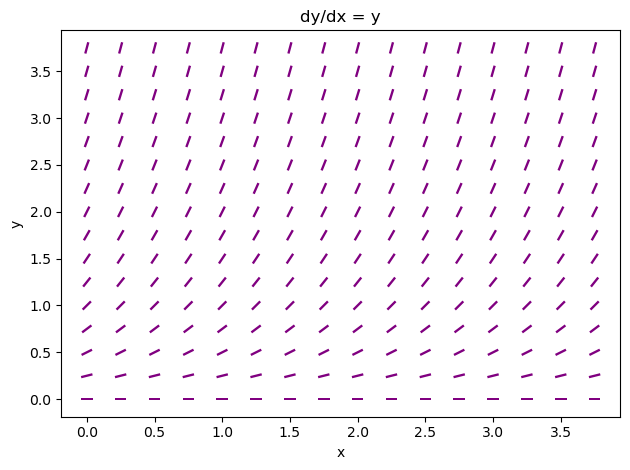

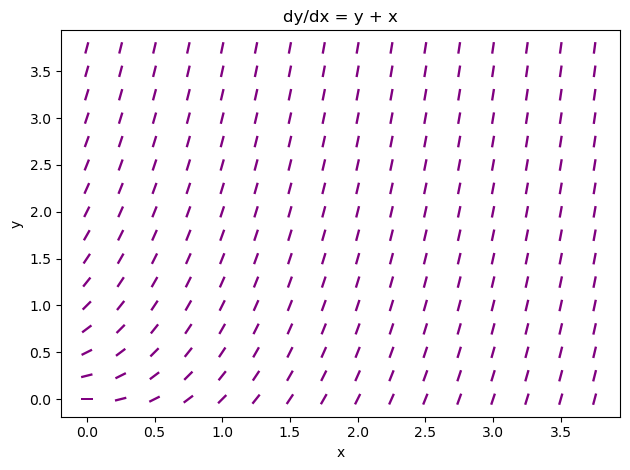

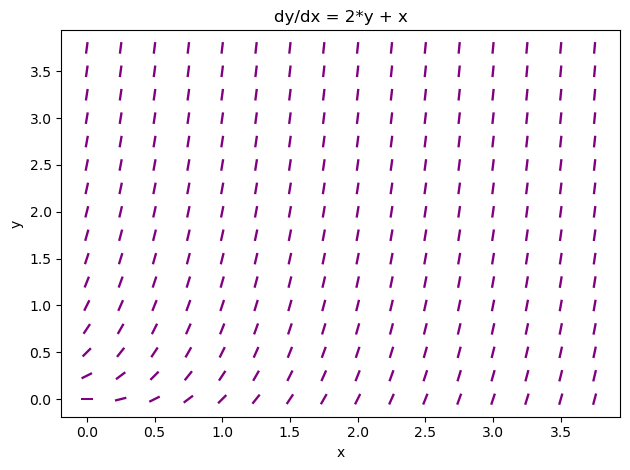

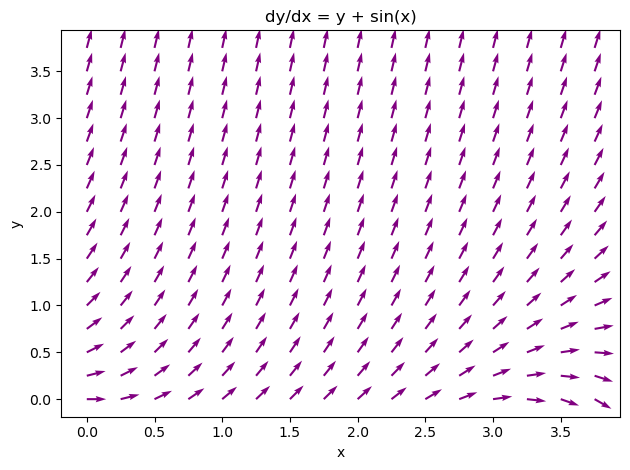

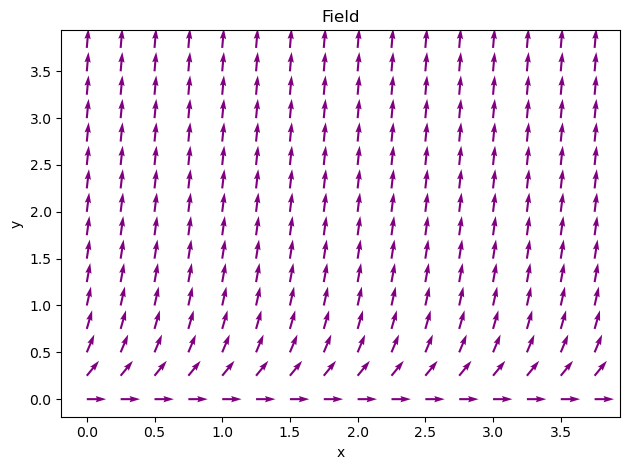

In [4]:
def create_meshgrid(xminrange = -3, xmaxrange = 3, yminrange = - 3, ymaxrange = 3, step = 0.3):
    x = np.arange(xminrange, xmaxrange + 1, step)
    y = np.arange(yminrange, ymaxrange + 1, step)
    return np.meshgrid(x, y)

def plot_vector_field(X, Y, dyf, vectors = True, xtitle = 'x', ytitle = 'y', title = 'Field'):
    dy = dyf
    dx = np.ones(dy.shape)

    norm = np.sqrt(dx**2 + dy**2)
    dyu = dy/norm
    dxu = dx/norm
    if vectors:
        plt.quiver(X,Y, dxu, dyu, color='purple')
    else:
        plt.quiver(X,Y, dxu, dyu, color='purple', 
                   headaxislength = 2, 
                   headlength = 0, 
                   pivot='middle', 
                   scale=10, 
                   linewidth = 2, 
                   units = 'xy', 
                   width=0.02, 
                   headwidth = 1)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.title(title)
    plt.tight_layout()
    plt.show()

X, Y = create_meshgrid(xminrange=0, xmaxrange=3, yminrange=0, ymaxrange=3, step=0.25)
plot_vector_field(X, Y, dyf= Y, vectors = False, title='dy/dx = y')
plot_vector_field(X, Y, dyf= Y + X, vectors = False, title='dy/dx = y + x')
plot_vector_field(X, Y, dyf= 2 * Y + X, vectors = False, title='dy/dx = 2*y + x')
plot_vector_field(X, Y, dyf= Y + np.sin(X), vectors = True, title='dy/dx = y + sin(x)')

# Division by zero
#plot_vector_field(X, Y, dyf= X/Y, vectors = True, title='dy/dx = x/y')
#plot_vector_field(X, Y, dyf= Y/X, vectors = True, title='dy/dx = y/x')

plot_vector_field(X, Y, dyf= 5*Y*(1 - Y/10), vectors=True)

### First Order Linear Differential Equations
We already discussed what linear DE are, so now let's discuss how they are solved. It turns out that there is a general formula which solves linear equations, however it is a bit unclear why and how it works and since memorizing formulas by heart is discouraged let's derive it. To begin with we make sure that our equation is in the following form $ \frac{dy}{dx} + p(x)y = g(x) $, where both $ p(x) $ and $ g(x) $ have to be continuous functions $^{[9]} $. When we have properly set up the equation then we proceed to find the integration factor, which is a function selected so that whenever a DE is multiplied by it the DE becomes integrable $ ^{[10]} $. We will be calling our integrating factor function $ \mu (x) $. Then we can proceed with the derivation of the general formula. First we multiply our equation by $ \mu(x) $.

$$ \frac{dy}{dx} + p(x)y = g(x) $$
$$ \mu(x)\frac{dy}{dx} + \mu(x)p(x)y = \mu(x)g(x) $$

Then we reveal the magic behind $ \mu(x) $ as it must satisfy the following condition $ \mu(x)p(x) = \mu'(x) $. Since we have $ \mu(x)p(x) $ in our equation we substitute it.

$$ \mu(x)\frac{dy}{dx} + \mu'(x)y = \mu(x)g(x) $$

We can notice that the left-hand side of our equation is the differentiation product rule as we once differentiate $ \mu(x) $ and once $ y $.

$$ (y \cdot \mu(x))' = \mu(x)g(x) $$

In order to find out $ y $ function we then integrate both sides and with some algebra we can express $ y $.

$$ \int y \cdot \mu(x))' dx = \int \mu(x)g(x) dx $$
$$ y \cdot \mu(x) + C = \int \mu(x)g(x) dx $$
$$ y = \frac{\int \mu(x)g(x) dx + C}{\mu(x)} $$

Now we have expressed $ y $ and we need to determine our integrating factor $ \mu(x) $. We can do that by the following rearrangement: 
$$ \mu(x)p(x) = \mu'(x) \rightarrow \frac{\mu'(x)}{\mu(x)} = p(x) $$ 
$$ (\ln{\mu(x)})' = p(x) $$
$$ \int (\ln{\mu(x)})' dx = \int  p(x) dx $$
$$ \ln{\mu(x)} = \int p(x) dx + k $$
$$ \mu(x) = e ^{\int p(x) dx + k} \rightarrow \mu(x) = ke ^{\int p(x) dx} $$

Finally we can substitute the integrating factor $ \mu(x) $ into the general formula.
$$ y = \frac{\int e^{\int p(x)dx} g(x)dx + C}{e^{\int p(x)dx}} $$

This looks a bit too messy so we will just use the general formula knowing $ \mu(x) = e ^{\int p(x) dx} $.
$$ y = \frac{\int \mu(x)g(x) dx + C}{\mu(x)} $$ 

### Bernoulli's Differential Equations
Bernoulli DEs are non-linear differential equations, which can easily be turned into linear through substitution. Bernoulli equations usually can be expressed by the following form.

$$ p(x)\frac{dy}{dx} + q(x)y = f(x)y^n $$

Where $ n \in \mathbb{R} $ except $\{0, 1\} $, as when $ n = 0 $ the equation is linear and when $ n = 1 $ the equation is separable. In order to convert the Bernoulli equation to a linear one first we need to remove the non-linear $ y^n $ term from the right-hand side and then we can proceed with substitution. We divide both sides by the non-linear term $^{[11]}$.

$$  p(x)y^{-n} y' + q(x)y^{1-n} = f(x) $$

Then we proceed by substituting.

$$ u = y^{1-n} $$
$$ u' =  (y^{1-n})' = (1-n)y^{-n}y' \rightarrow y^{-n}y' = \frac{u'}{1-n} $$ 

After having expressed $ y^{1-n} $ and $ y^{-n}y' $ we get.

$$ \frac{p(x)}{1-n}u' + q(x)u = f(x) $$

And just like that we converted a non-linear equation into a first order linear one, which can be solved by using the integrating factor. 

### Logistic Population Model
The logistic population model is a famous Bernoulli equation invented by Pierre Verhulst. The logistic function essentially tells us the rate of change of population with respect to time. It turns out that the increase in population is proportional to the population itself, however in reality there are outside factors, which limit the growth of population to a particular limiting value. Let's look into the model.

$$ y' = ry $$

This would be the model if the growth of the population was not limited by any factors. The constant $ r $ is proportionality factor. So far our model is non-limited and its solution would look like so $ y = y_0e^{rt}$, where $ y_0 $ is the initial population. To have a realistic model the growth of population would have to approach zero when the population gets closer to the limiting value of the model. We will be calling the liming value $ K $.

$$ y' = ry - \frac{r}{K}y^2 $$

Notice that this has now become a Bernoulli equation. This modeling equation is often written like so.

$$  y' = ry(1 - \frac{y}{K}) $$

Let's look into the slope field of this equation. To get a nice looking graph we will consider the case when $ r = 1 $ and $ k = 5$. As $ y $ is population we would also assume that $ 0 < y $ 


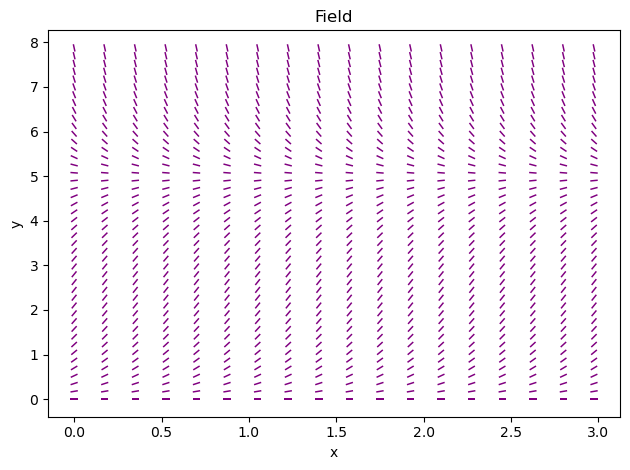

In [141]:
X, Y = create_meshgrid(0, 2, 0, 7, 0.175)
plot_vector_field(X, Y, dyf= Y*(1 - Y/5), vectors=False)

From the plot above we can see that indeed when $ y $ is less than the limit $ k $ it tends to stabilize around $ k $, although it never reaches it, and whenever $ y $ is above $ k $ it again stabiles around $ k $.

Although this is a Bernoulli equation it is also solvable as a separable one, by solving it we can find the so called logistic function. We can express $ y' = ry(1 - \frac{y}{K}) $ in the following manner.

$$ \frac{1}{y(1-\frac{y}{K})} \frac{dy}{dt} = r $$

We can then express the left-hand side through partial fraction expansion like so.

$$ \frac{1}{y} + \frac{\frac{1}{K}}{1 - \frac{y}{K}} \frac{dy}{dt} = r $$
$$ \int \frac{1}{y} dy + \int \frac{\frac{1}{K}}{1 - \frac{y}{K}} dy = \int r dt $$

We can then integrate by using u substitution on the left-hand side and we get the following result.

$$ \ln(y) - \ln(1 - \frac{y}{K}) = rt + C $$
$$ \ln(\frac{y}{1 - \frac{y}{K}}) = rt + C $$
$$ e^{\ln(\frac{y}{1 - \frac{y}{k}})} = e^{rt + C} $$
$$ \frac{y}{1 - \frac{y}{K}} = Ce^{rt} $$
$$ \frac{1 - \frac{y}{K}}{y} = Ce^{-rt}  $$
$$ \frac{1}{y} - \frac{1}{K} = Ce^{-rt} $$
$$ y = \frac{1}{Ce^{-rt}+ \frac{1}{K}} $$

We have finally expressed $ y $ as a function of t. This is the logistic function. We can actually express our constant term by substituting $ t = 0 $.
$$ y(0) = \frac{1}{C + \frac{1}{K}} = y_0 $$
$$ C = \frac{1}{y_0} - \frac{1}{K} $$

We can then substitute for $ C $ and rewrite our function.
$$ y = \frac{1}{(\frac{1}{y_0} - \frac{1}{K})e^{-rt}+ \frac{1}{K}} $$  
$$ y = \frac{y_0K}{(K - y_0)e^{-rt} + y_0}  $$ 


Now that we have found the solution let's plot some examples.

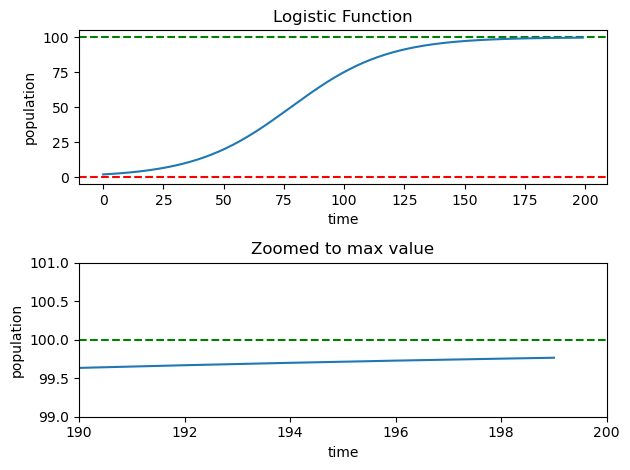

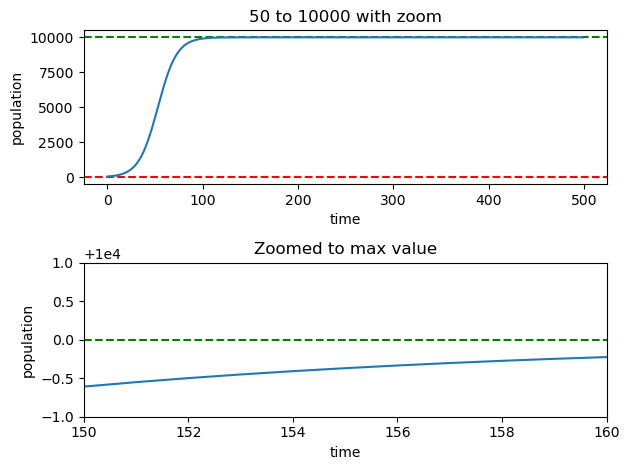

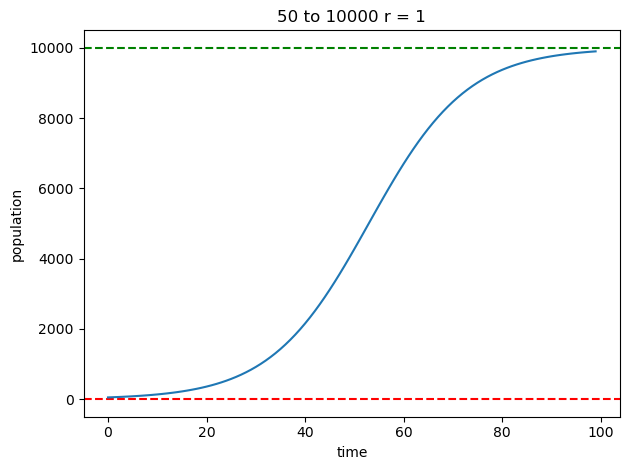

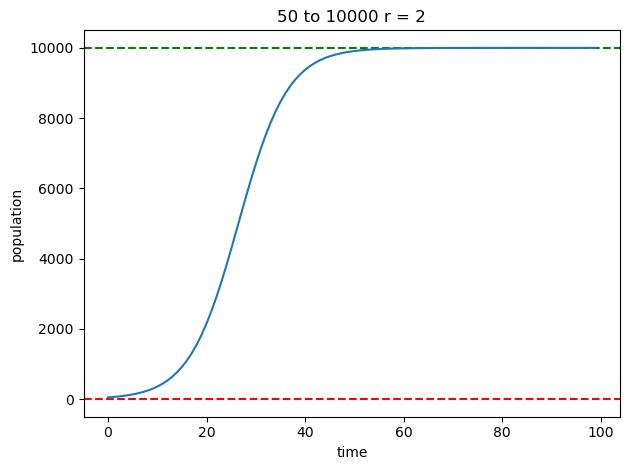

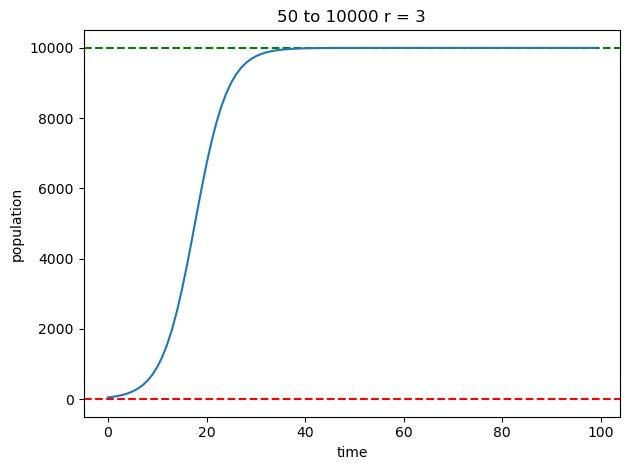

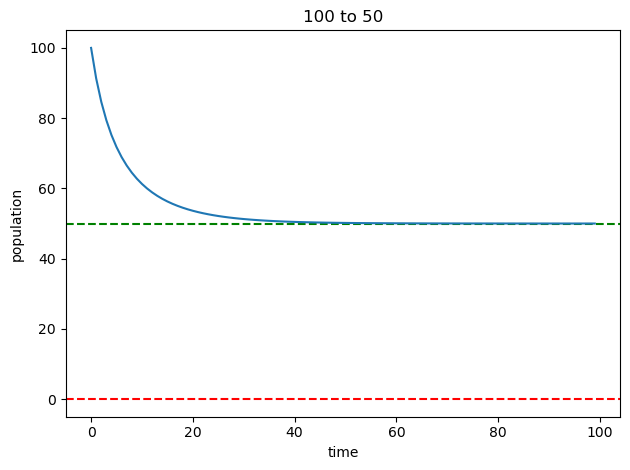

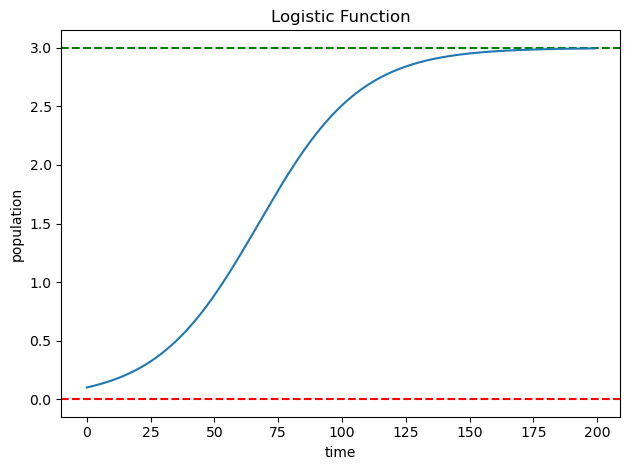

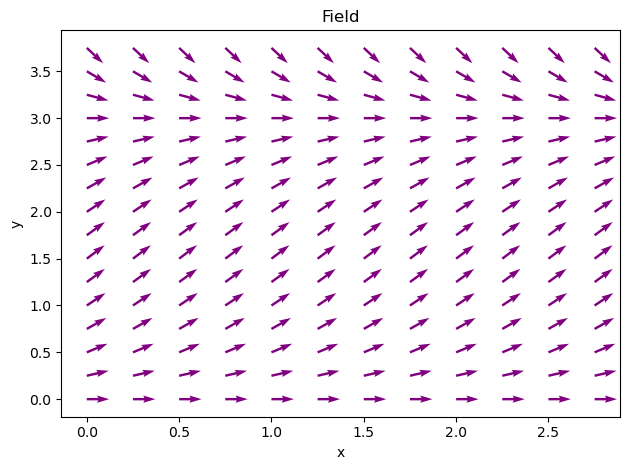

In [5]:
def plot_logistic(t0=0, tmax = 20, step = 0.1, y0 = 2, K = 100, r = 0.5, zoom_range = [-10, 0, -1, 1], title ='Logistic Function' ):
    t = np.arange(t0, tmax, step)
    y0 = y0
    K = K
    r = r
    y = (y0 * K)/((K - y0)*np.exp(-t * r) + y0)


    if zoom_range:
        fig, (ax1, ax2) = plt.subplots(2)
        ax1.axhline(y = 0, linestyle = 'dashed', color ='red')
        ax1.axhline(y=K, linestyle = 'dashed', color='green')
        ax1.plot(y)
        ax1.title.set_text(title)
        ax1.set_xlabel('time')
        ax1.set_ylabel('population')

        ax2.axhline(y = 0, linestyle = 'dashed', color ='red')
        ax2.axhline(y= K, linestyle = 'dashed', color='green')
        ax2.plot(y)
        ax2.title.set_text('Zoomed to max value')
        ax2.set_xlabel('time')
        ax2.set_ylabel('population')

        xmin = len(t) + zoom_range[0]
        xmax = len(t) + zoom_range[1]
        ymin = K + zoom_range[2]
        ymax = K + zoom_range[3]
        ax2.axis(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax)
    else:
        plt.axhline(y = 0, linestyle = 'dashed', color ='red')
        plt.axhline(y = K, linestyle = 'dashed', color='green')
        plt.plot(y)
        plt.title(title)
        plt.gca().set_xlabel('time')
        plt.gca().set_ylabel('population')
    

    plt.tight_layout()
    plt.show()

# Test logistic function
plot_logistic()
plot_logistic(t0=0, tmax=50, step=0.1, y0=50, K = 10_000, r=1, zoom_range=[-350, -340, -1, 1], title= '50 to 10000 with zoom')
plot_logistic(t0=0, tmax=10, step=0.1, y0=50, K = 10_000, r=1, zoom_range=[], title='50 to 10000 r = 1')
plot_logistic(t0=0, tmax=10, step=0.1, y0=50, K = 10_000, r=2, zoom_range=[], title='50 to 10000 r = 2')
plot_logistic(t0=0, tmax=10, step=0.1, y0=50, K = 10_000, r=3, zoom_range=[], title='50 to 10000 r = 3')
plot_logistic(t0=0, tmax=10, step=0.1, y0=100, K = 50, r=1, zoom_range=[], title='100 to 50')

# compare solution to vector field
plot_logistic(y0=0.1, K =3, zoom_range=[])
X, Y = create_meshgrid(xminrange=0, xmaxrange=2, yminrange=0, ymaxrange=3, step=0.25)
plot_vector_field(X, Y, dyf= Y*(1 - Y/3))


### Second Order Linear Differential Equations
*References:* $^{[12], [13]}$

We already looked into first order linear DEs we can proceed with second order linear DEs. A general formula for second order linear DEs can be written as so.

$$ p(x)y'' + q(x)y' + r(x)y = f(x) $$

In the case of constant coefficients DE we will use the following formula instead.

$$ ay'' + by' + cy = f(x) $$

Any second order linear DEs with non-constant coefficients are difficult to solve, but prove to be a handy tool when modeling different systems. Constant coefficient equations are much easier to solve although sometimes they have their fair share of trickiness to them. The classification of homogeneity applies to second order functions as well. If $ f(x) = 0 $ the function is homogeneous, if $ f(x) \neq 0 $ the function is non-homogeneous $^{[12]}$. For now we can inspect the following homogeneous constant coefficient second order linear DE.

$$ y'' - 9y = 0 $$

The both functions $ y = e^{3x} $ and $ y = e^{-3x} $ satisfy the equations. However, as we have seen already, these are not the only solutions. In fact, every linear combination of these two functions will be solutions to this DE. This is the so called principle of superposition. The superposition principles states that if a function satisfies both properties: additivity $ F(x_1 + x_2) = F(x_1) + F(x_2) $ and homogeneity $ F(\alpha x) = \alpha F(x)$ can be classified as a linear function $^{[13]}$. Since we are having a look at an linear function and we have found 2 solutions through the additivity property we can express any other solution as the following expression.

$$ y = C_1e^{3x} +  C_2e^{-3x} $$

It turns out that we have expressed the general solution of every linear homogeneous second order DE. What's more, we can notice the presence of $ e^{3x} $ and $ e^{-3x} $, this is not a coincidence and we will discuss it later on as for now we can assume that the solutions of homogeneous linear second order DEs will have the following form.

$$ y = e^{rx} $$

If we check weather or not this form satisfies the general form we can substitute.

$$ ay'' + by' + cy = 0 $$ 
$$ a(e^{rx})'' + b(e^{rx})' + ce^{rx} = 0 $$ 
$$ a(r^2e^{rx}) + b(re^{rx}) + ce^{rx} =0 $$
$$  e^{rx}(ar^2 + br + c) = 0 $$

Since the term $ e^{rx} $ can never be 0 this means the term $ ar^2 + br + c $ is equal to 0. Essentially we arrive at the conclusion that.

$$ ar^2 + br + c = 0 $$

This is the so called characteristic equation. In fact is a polynomial of second degree. Each second degree polynomial can have only three possible states of solutions. The solutions can be 2 unique solutions $ r_1 \neq r_2 $, 2 complex roots $ r_{1,2} = \lambda \pm \mu i  $ or one double root $ r_1 = r_2 $. We have already looked into an example of 2 unique solutions as the equation $ y'' - 9y = 0 $ had 2 unique solutions for its characteristic equation then we will look deeper into a complex root solutions. 

$$ ar^2 + br + c = 0 $$
$$ r_{1,2} = \lambda \pm \mu i $$

We know that the solutions have the form $ y = e^{rt} $ so we substitute.

$$ y = C_1e^{(\lambda + \mu i)x} + C_2e^{(\lambda - \mu i)x} $$
$$ y = C_1e^{\lambda x}e^{\mu ix} + C_2e^{\lambda x}e^{-\mu ix} $$
$$ y = e^{\lambda x}(C_1e^{\mu ix} + C_2e^{-\mu ix}) $$

Euler's formula states that $ e^{ix} = \cos(x) + i\sin(x)$, which we means that we can rewrite the solution.

$$ y = e^{\lambda x}(C_1(\cos(\mu x) + i\sin(\mu x)) + C_2(\cos(-\mu x) + i\sin(-\mu x))) $$
$$ y = e^{\lambda x}(C_1\cos(\mu x) + C_1i\sin(\mu x) + C_2\cos(\mu x) - C_2i\sin(\mu x)) $$
$$ y = e^{\lambda x}((C_1 + C_2)\cos(\mu x) + (C_1 - C_2)i\sin(\mu x)) $$
$$ y = e^{\lambda x}(C_3\cos(\mu x) + C_4\sin(\mu x)) $$
$$ y = C_3e^{\lambda x}\cos(\mu x) + C_4e^{\lambda x}\sin(\mu x) $$ 

We can look into this complex number example now.

$$ y'' + y' + y = 0 $$
$$ r_{1,2} = -\frac{1}{2} \pm \frac{\sqrt{- 3}}{2}i  $$

Then we substitute and we get.

$$ y = C_1e^{-\frac{1}{2}x}\cos(\frac{\sqrt{- 3}}{2} x) + C_2e^{-\frac{1}{2} x}\sin(\frac{\sqrt{- 3}}{2} x)$$ 

Repeated roots are a bit tricky so we will derive a general solution for repeated roots equation. If we substitute into our formula with $ r_1 = r_2 = r$ we get.

$$ y = C_1e^{rx} + C_2e^{rx}$$
$$ y = C_3e^{rx} $$

Notice how there is a single constant and since the equation is second order two initial conditions are needed, however, usually if leave out the solution like so when we apply the initial conditions we get different values for our constant $ C_3 $, which indicates that something is not right. To find the second solution and in fact the real general solution we can assume that the solution will have the following form, where $ u $ is a function of $ x $. 

$$ y_2 = uy_1 $$
$$ y_2 = ue^{rx} $$

We can then proceed to check if this satisfies the equation by differentiating twice and substituting back into the equation.

$$ y_2' = u'e^{rx} + rue^{rx} $$
$$ y_2'' = u''e^{rx} + rue^{rx} + r^2ue^{rx} $$

We substitute $ y_2'' $, $ y_2' $ and $ y_2 $ into our equation.

$$ ay'' + by' + c' = 0 $$
$$ e^{rx}(au'' + (r^2 + c)u) = 0 $$

We know that $ r = -\frac{b}{2a}$ and we can express the equation like so.

$$ e^{rx}(au'' - \frac{b^2 - 4ac}{4a}u) = 0 $$

The term $ e^{rx} $ can never be zero and we know that $ b^2 - 4ac = 0 $, so the only possibility is that $ u $ is indeed a solution as $ au'' = 0 \rightarrow u'' 0 $. By integrating $ u'' $ twice we get that $ u = (cx + k) $, where $ c $ and $ k $ are constants. We can then express $ y_1 = e^{rx} $ and $ y_2 = (cx + k)e^{rx}$. We substitute into $ y = C_1y_1 + C_2y_2 $ and finally we get the following.

$$ y = C_1e^{rx} + C_2xe^{rx} $$

### Harmonic Oscillators

*References:* $^{[19] [20] [21] [22]}$

Now that we have looked into linear second order DEs we can discuss what they are used for. One of the most famous applications for these equations are the oscillators models. By definition a non-trivial solution to a DE with the form $ F(x, y, y', \dots, y^{(n-1)}) = y^n $, where $ x \in [0, + \infty) $ can be classified as oscillating provided it has an infinite amount of solutions. A well-known model is the simple harmonic oscillator, which describes the motion of a mass attached to a spring. We can derive it by combing both Hooke's law of elasticity and Newton's second law. 

Newton
$$ F_N = ma \rightarrow F = my'' $$

Hooke
$$ F_H = -ky $$ 

In these equations we will be looking at $ y $ as a function of time and its value will be the distance travelled from the equilibrium position in a given moment. The constant $ k $ is spring stiffness coefficient ($ k > 0$) and $ m $ is the weight of the object attached to the spring.

$$ F_N = F_H $$
$$ my'' = -ky $$
$$ my'' + ky = 0 $$

We can divide by the mass $ m $

$$ y'' + \frac{k}{m}y = 0 $$

Some confusion which may arise when looking at the initial values for these problems. The initial value $ y(0) = y_0 $ is the initial stretch of the spring, while $ y'(0) = c $ is the initial velocity. We will look at what happens when $ y'(0) = 0 $ 

It is common to assume that $ \sqrt{\frac{k}{m}} = \omega $, therefore $ \omega^2 = \frac{k}{m}$.

$$ y'' + \omega^2 y = 0 $$

This is a linear ordinary second order DE whose solution we can find through its characteristic equation.

$$ r^2 + \omega^2 = 0 $$
$$ r_{1,2} = \pm i \omega $$
$$  y(t) = C_1 \cos(\omega t) + C_2\sin(\omega t)$$

The $ \omega $ constant is a the natural frequency. The frequency can be found like so $ f =\frac{\omega}{2 \pi} $ and since $ \omega = \sqrt{\frac{k}{m}}$ we can conclude that the oscillations are quicker oscillations occur when the spring coefficient is higher or when the mass is lower. 

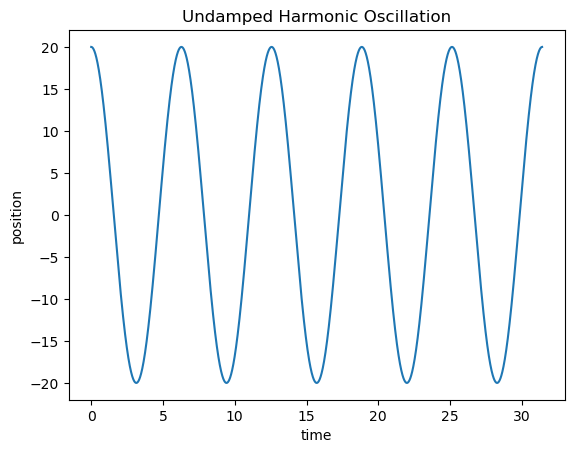

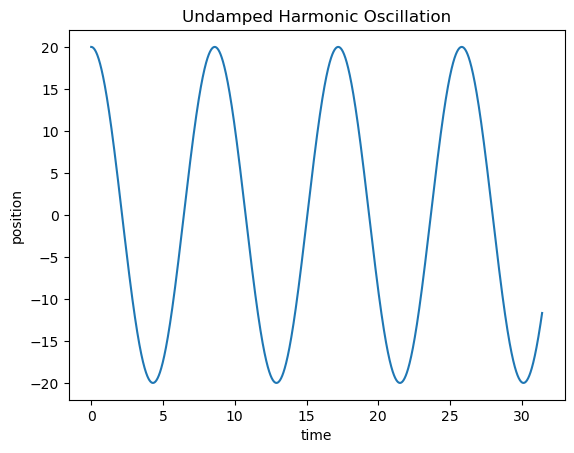

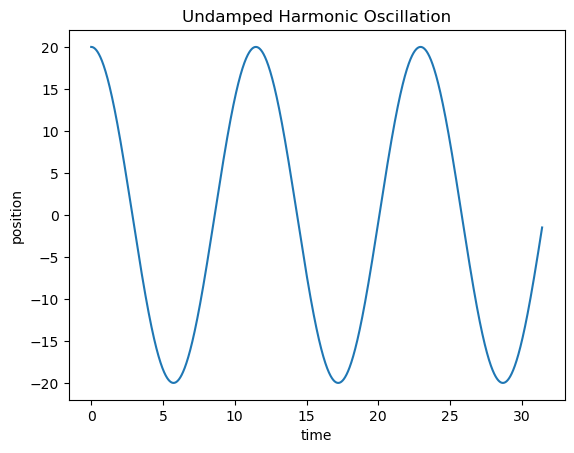

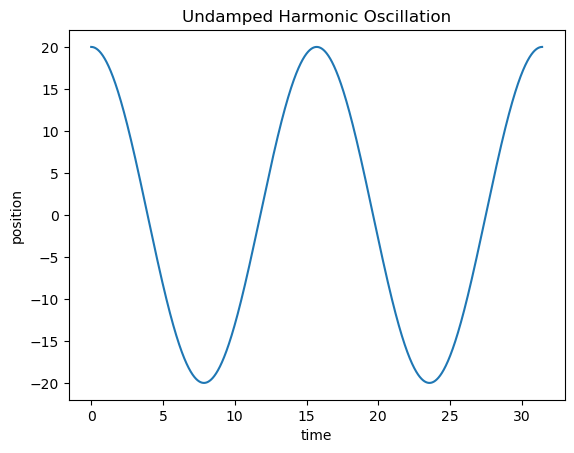

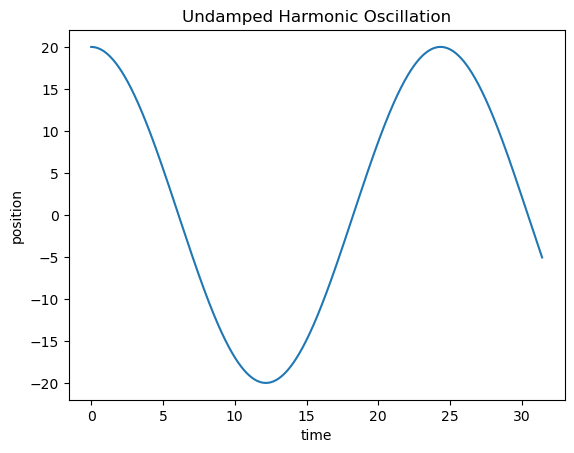

In [109]:
def undamped_harmonic_oscillator(spring_coefficient = 1, mass = 1, initial_y = [0, 20], initial_dydt = [0, 0]):
    omega = np.sqrt(spring_coefficient / mass)
    t = np.arange(0, 10*np.pi, 0.01)

    C1, C2 = sp.symbols('C1, C2')
    
    t_y = initial_y[0]
    y_eq_val = initial_y[1]
    y_eq = sp.Eq(C1 * cos(omega * t_y) + C2 * sin(omega * t_y), y_eq_val)


    t_dydt = initial_dydt[0]
    dydt_eq_val = initial_dydt[1]
    dydt_eq = sp.Eq(omega * (-C1 * sin(omega * t_dydt) + C2 * cos(omega * t_dydt)), dydt_eq_val)

    output = solve([y_eq,dydt_eq], dict=False)
    C1_value = output[C1] 
    C2_value = output[C2] 
    y = C1_value* np.cos(omega * t) + C2_value * np.sin(omega * t)

    plt.title("Undamped Harmonic Oscillation")
    plt.xlabel("time")
    plt.ylabel("position")
    plt.plot(t, y)
    plt.show()

undamped_harmonic_oscillator()
undamped_harmonic_oscillator(spring_coefficient = 0.8, mass =1.5)
undamped_harmonic_oscillator(spring_coefficient = 0.6, mass = 2)
undamped_harmonic_oscillator(spring_coefficient = 0.4, mass = 2.5)
undamped_harmonic_oscillator(spring_coefficient = 0.2, mass = 3)

Undamped harmonic oscillations are predictable and will keep oscillating forever as there is nothing to reduce their speed or acceleration. We can notice that whenever our initial condition $ y(0) = y_0 $ the amplitude of the waves are equal to the given $ y_0 $. 

Damped harmonic oscillations are much more interesting and we can express them by introducing air resistance coefficient proportionate to the velocity of the system

$$ my'' + \gamma y' + ky = 0 $$
$$ y'' + \frac{\gamma}{m} y' + \frac{k}{m} y = 0 $$

Previously we expressed $ \omega = \sqrt{\frac{k}{m}}$ now we will express $ 2R = \frac{\gamma}{m}$

$$ y'' +  2Ry' + \omega^2 y = 0 $$

We can then proceed to find roots with the quadratic formula

$$ r_{1,2} = \frac{-2R \pm \sqrt{4R^2 - 4 \omega^2}}{2} $$
$$ r_{1,2} = \frac{-2r \pm 2\sqrt{R^2 - \omega^2}}{2} $$
$$ r_{1,2} = -r \pm \sqrt{R^2 - \omega^2} $$

Then we have tree options depending on whether $ R^2 $ is greater, lower or equal to $ \omega^2 $

1. $ R^2 < \omega^2 $: Complex solutions as $ D < 0 $. Dampening oscillations.
$$ r_{1, 2} = -R \pm \sqrt{R^2 - \omega^2} $$
$$ r_{1, 2} = -R \pm i\sqrt{\omega^2 - R^2} $$
$$ r_{1, 2} = -R \pm i\zeta $$

2. $ R^2 > \omega^2 $: Real solutions as $ D > 0$. No oscillations occur, instead the mass swiftly returns to its stable position
$$ r_{1, 2} = -R \pm \sqrt{R^2 - \omega^2} $$
$$ r_1 \neq r_2 $$

3. $ R^2 = \omega^2 $: Double root as $ D = 0 $. No oscillations occur, instead the mass swiftly returns to its stable position
$$ r_{1, 2} = -R \pm \sqrt{R^2 - \omega^2} $$
$$ r_1 = r_2 $$

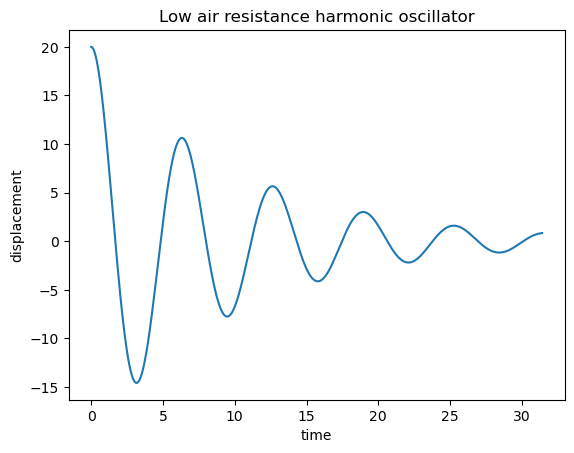

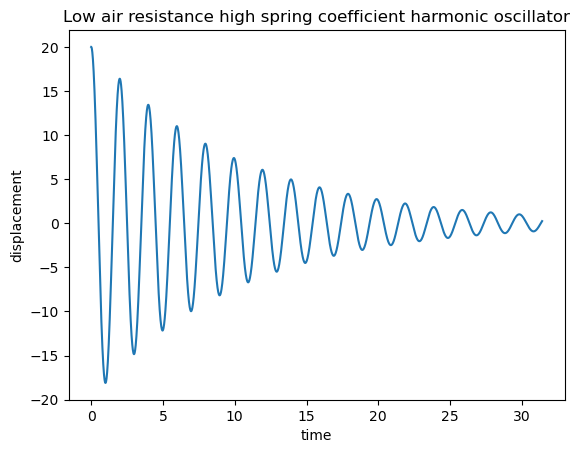

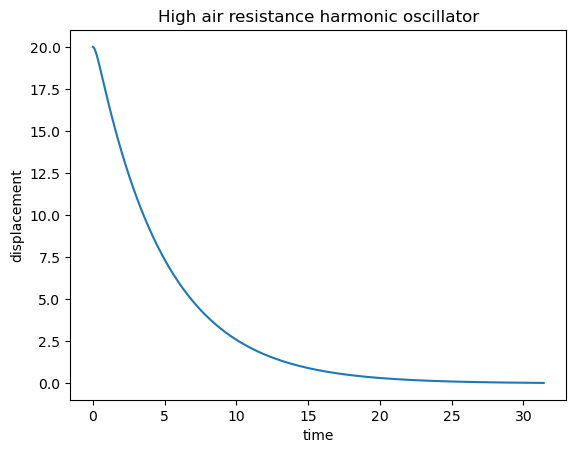

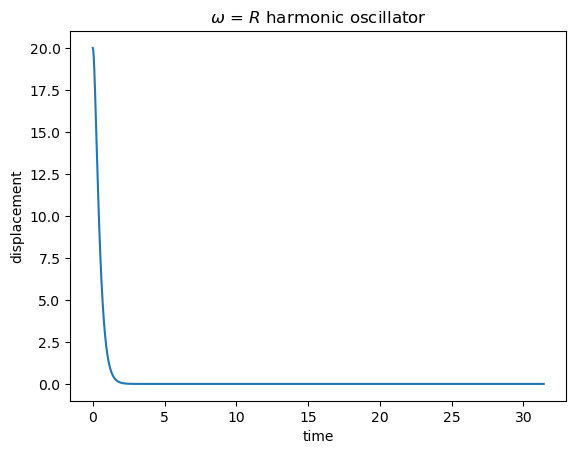

In [77]:
def damped_harmonic_oscillator(spring_coefficient = 1, mass = 1, air_resistance = 1,  initial_y = [0, 20], initial_yprime = [0, 0], title="Damped Harmonic Oscillator"):
    omega = np.sqrt(spring_coefficient / mass)
    R = (air_resistance / 2 * mass)
    t = np.arange(0, 10 * np.pi, 0.01)
    
    C1, C2, t_symbol = sp.symbols('C1, C2, t')
    y_t0 = initial_y[0]
    y_equation_value = initial_y[1]
    yprime_t0 = initial_yprime[0]
    yprime_equation_value = initial_yprime[1]

    D = cmath.sqrt(R ** 2 - omega ** 2)

    if D.imag != 0 and D.real == 0:
        zeta = np.sqrt(omega ** 2 - R ** 2)

        y_equation = sp.Eq(C1 * np.exp(-R * y_t0) * cos(zeta * y_t0) + C2 * np.exp(-R * y_t0) * sin(zeta * y_t0), y_equation_value)
        yprime_equation = sp.Eq(-np.exp(-R * yprime_t0) * ((C2 * R + C1 * zeta) * sin(zeta * yprime_t0)+ (C1 * R - C2 * zeta)  * cos(zeta * yprime_t0)), yprime_equation_value)
        
        output = solve([y_equation,yprime_equation], dict=False)
        C1_value = output[C1] 
        C2_value = output[C2] 

        y = C1_value * np.exp(-R * t) * np.cos(zeta * t) + C2_value * np.exp(-R * t) * np.sin(zeta * t)
        plt.plot(t, y)
    elif D.imag == 0 and D.real != 0:
        root_one = (-R + D)
        root_two = (-R - D)

        y_equation = sp.Eq(C1 * np.exp(root_one * y_t0) + C2 * np.exp(root_two * y_t0), y_equation_value)
        yprime_equation = sp.Eq(C1 * root_one * np.exp(root_one * yprime_t0) + C2 * root_two* np.exp(root_two * yprime_t0), yprime_equation_value)

        output = solve([y_equation, yprime_equation], dict=False)
        C1_value = output[C1] 
        C2_value = output[C2] 

        y = C1_value* np.exp(root_one * t) + C2_value * np.exp(root_two * t)
        plt.plot(t, y)
    else:
        double_root = -R 

        y_equation = sp.Eq(C1 * np.exp(double_root * y_t0) + C2 * y_t0 * np.exp(double_root * y_t0), y_equation_value)
        yprime_equation = sp.Eq( np.exp(double_root * yprime_t0) * (C2 * double_root * yprime_t0 + C1 * double_root + C2), yprime_equation_value)

        output = solve([y_equation, yprime_equation], dict=False)
        C1_value = output[C1] 
        C2_value = output[C2] 

        y = C1_value * np.exp(double_root * t) + C2_value * t * np.exp(double_root * t)
        plt.plot(t, y)

    plt.xlabel("time")
    plt.ylabel("displacement")
    plt.title(title)
    plt.show()

# Low Air Resistance
damped_harmonic_oscillator(air_resistance = 0.2, title = "Low air resistance harmonic oscillator")
damped_harmonic_oscillator(air_resistance = 0.2, spring_coefficient=10, title = "Low air resistance high spring coefficient harmonic oscillator")


# High Air Resistance
damped_harmonic_oscillator(air_resistance = 5, title="High air resistance harmonic oscillator")

# Air Resistance = Spring Coefficient
damped_harmonic_oscillator(air_resistance = 8, spring_coefficient = 16, title='$\omega$ = $R$ harmonic oscillator')

### Reduction of Order 
*References:* $^{[14]}$

The reduction of order method allows us to convert one linear DE into another except the second one would be of lower order. This is very useful as we can construct the general solution of the higher order DE through the general solution of the lower order DE. Normally we would need to know one non-trivial solution to the higher order DE. We can then proceed to express the following substitution $ y_2 = y_1u $, where $ u $ is a function of $ x $. Then we can find derivatives of our newly found $ y_2 $ and proceed to substitute into the high-order DE. Eventually we transform the high order DE into the following.

$$ a_0y^N + a_1y^{N−1} + \cdots + a_{N−2}y'' + a_{N−1}y' + a_Ny = f(x) \rightarrow A_0u^N + A_1u^{N−1} + \cdots + A_{N−2}u' + A_{N−1}u' = f(x) $$

Notice the lack of $ A_Nu $ term. This allows us to use substitution once more. This time we substitute $ v = u' $ and then substitute into the equation. 

$$ v = u' $$
$$ A_0v^{N−1} + A_1v^{N−2} + \cdots + A_{N−2}v' + A_{N−1}v = f(x) $$

Now that we have reduced the order we can find solution to $ v $ and since $ v = u' $ we can find $ \int udx = v $. Finally, we substitute back into the first substitution $ y_2 = y_1u $


In fact this is sort of what we did in the previous section when it come to repeated roots.  

### System of Linear Differential Equations

*References:* $ ^{[16, 17]} $

Systems are very useful in practice as they are used in many modeling equations which help us describe intricate entangled models. One famous such problem which requires systems in the so called predator-prey model or Lotka-Volterra equations. Systems of DEs look much like any other system, except instead of entangled variables there are entangled derivatives. Coupled system of linear DEs are very useful as they can be used to represent any higher order DE in terms of linear DEs, which are much easier to solve. Reducing a higher order DEs to system of linear DEs is done by introducing new variables like so.

$$ a_ny^n + a_{n-1}y^{(n-1)} + \cdots + a_2y'' + a_1y' + a_0y = 0  $$
$$ 
   U = \begin{bmatrix}
        u_1 = y \\
        u_2 = y' \\
        u_3 = y'' \\
        \vdots \\
        u_n = y^{n-1} \\
    \end{bmatrix}
$$

When we have defined our new variables we can notice that.

$$ 
   U' = \begin{bmatrix}
        u_1' = u_2 \\
        u_2' = u_3 \\
        u_3' = u_4 \\
        \vdots \\
        u_n' = y^n \\
    \end{bmatrix}
$$

The final term in our matrix is equal to $ y^n $ and from the form of the higher order DE we can express $ y^n = - a_{n-1}y^{(n-1)} - \cdots - a_2y'' - a_1y' - a_0y  $, but we have already expressed $ y $, $ y' $, $ y'' $ and so on so we can substitute $ y^n = - a_{n-1}u_n - \cdots - a_2u_3 - a_1u_2 - a_0u_1 $. Essentially we get the following vector which can be treated a system of linear equations.

$$ 
    \begin{bmatrix}
        u_1' = u_2 \\
        u_2' = u_3 \\
        u_3' = u_4 \\
        \vdots \\
        u_n' = - a_{n-1}u_n - \cdots - a_2u_3 - a_1u_2 - a_0u_1 \\
    \end{bmatrix}
$$

$$
    \frac{d}{dx} \begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ \vdots \\ u_{n-1} \\ u_n \\\end{bmatrix} =
    \begin{bmatrix}
        0 & 1 & 0 & \cdots & 0 & 0 \\
        0 & 0 & 1 & \cdots & 0 & 0 \\
        0 & 0 & 0 & \cdots & 0 & 0 \\
        \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
        0 & 0 & 0 & \cdots & 0 & 1 \\
        -a_0 & -a_1 & -a_2 & \cdots & -a_{n-2} & -a_{n-1} \\
    \end{bmatrix} 
    \begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ \vdots \\ u_{n-1} \\ u_n \\\end{bmatrix}     
$$

We can express the system above as follows.

$$ U' = AU $$

We have managed to express DEs through linear algebra and in return it turns out that the eigenvalues of the matrix $ A $ are the solutions to the characteristic equation of out higher order DE. Let's solve an example.

$$ y''-5y'+y = 0 $$
$$ y(3) = 6 $$
$$ y'(3) = -1 $$

We can start by defining variables.

$$
 U = \begin{bmatrix}
        u_1 = y \\
        u_2 = y' \\
    \end{bmatrix}
$$

$$
    U' = \begin{bmatrix}
        u_1' = y' \\
        u_2' = y'' = -\frac{1}{2}u_1 + \frac{5}{2}u_1'  \\
    \end{bmatrix}
$$

Initial conditions also have to be converted.

$$ u_1(3) = y(3) = 6 $$
$$ u_2(3) = y′(3) = −1 $$

Finally we can express the equation like so.

$$ 	
    \begin{matrix}
        u_1' = u_2 &  u_1(3) = 6\\
        u_2' = -\frac{1}{2}u_1 + \frac{5}{2}u_1' & u_2(3) = -1
    \end{matrix} 
$$

### Phase Diagrams

*References:* $ ^{[18]} $

Phase diagrams are a useful tool for visualizing how a dynamical system evolves over time. Every point on a phase diagram represents initial conditions for the dynamical system and by following these conditions plots of solutions are displayed on the diagrams. We can now plot some phase diagrams by using built in ODE solver. 


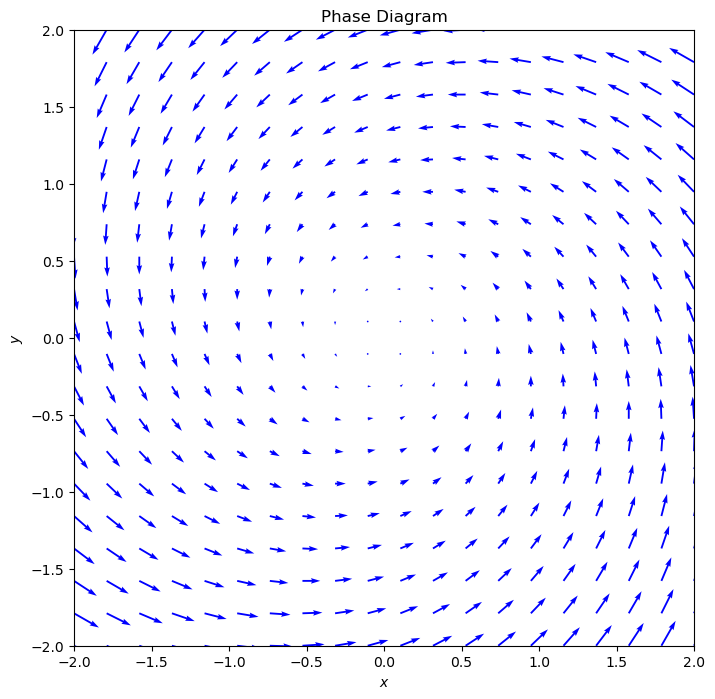

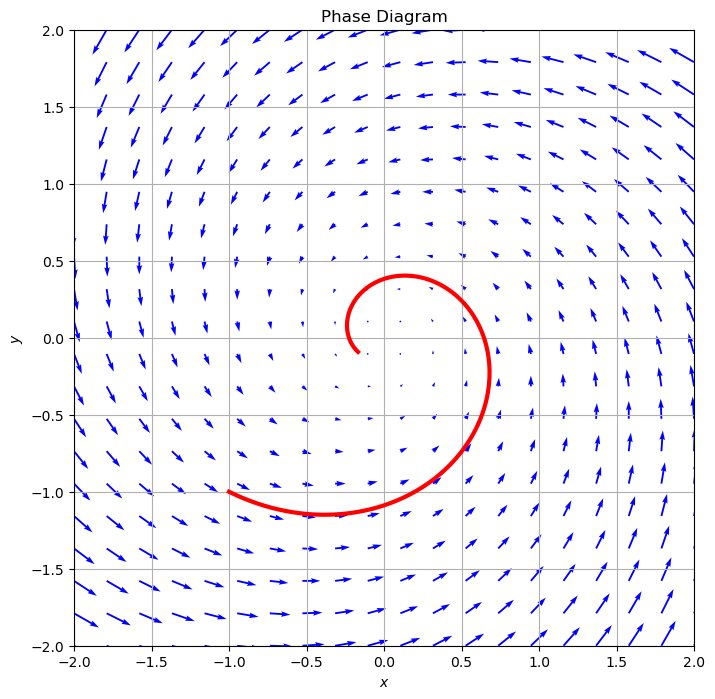

In [6]:
def plot_phase_diagram(equation_system, initial_conditions, time, min_x = -2, max_x = 2, min_y = -2, max_y = 2, steps = 20, title='Phase Diagram'):
    x = np.linspace(min_x,max_x,steps)
    y = np.linspace(min_y,max_y,steps)

    X, Y = np.meshgrid(x, y)

    # projections of the trajectory tangent vector 
    dX = np.zeros(X.shape)
    dY = np.zeros(Y.shape)

    x_shape, y_shape = X.shape
    for i in range(x_shape):
        for j in range(y_shape):
            x_cord = X[i, j]
            y_cord = Y[i, j]
            dxdt_result = equation_system([x_cord, y_cord], 0)
            dX[i,j] = dxdt_result[0]
            dY[i,j] = dxdt_result[1]
        
    plt.figure(figsize=(8, 8))
    
    plt.quiver(X, Y, dX, dY, color='b')

    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.title(title)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.show()

    solution = odeint(equation_system, initial_conditions, time)

    plt.figure(figsize=(8, 8))

    plt.quiver(X, Y, dX, dY, color='b')
    plt.xlim(-2,2)
    plt.ylim(-2,2)


    # add the state trajectory plot
    solution_x = solution[:,0]
    solution_y = solution[:,1]

    plt.plot(solution_x, solution_y, color='r', linewidth=3)
    plt.title(title)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.grid(True)
    plt.show() 


def equation_system(z,t):
        dzdt = [-z[0] -3 * z[1] , 3 * z[0] - z[1]]
        return dzdt

plot_phase_diagram(equation_system=equation_system, initial_conditions=np.array([-1,-1]), time=np.linspace(0,2,200))

### Lotka-Volterra Equations (Predator-Prey)
*Refrences:* $^{[24] [25] [26]]}$  
*Code References:* $^{[23] [27]}$

These equations represent pairs of first order non-linear ODEs in which, usually, there are 2 species which depend on each other making these systems coupled. These systems help us model real life dynamics of species by representing the rate of change of population and how it is dependant on the current population and, crucially, the population of other species. The Lotka-Volterra equations often look like so.

$$ \frac{dx}{dt} = \alpha x - \beta xy $$
$$ \frac{dy}{dt} = -\gamma y + \delta xy $$

In this system the $x$ and $y$ are functions of population of prey and predator respectively. We will look at a popular case where the prey are rabbits and the predator are foxes. The scalars $\alpha$ and $\beta$ are growth rate of rabbits and death rate of rabbits caused by presence of foxes, while $\gamma$ and $\delta$ are death rate of foxes and growth rate of foxes dependant on the rabbits. Essentially for the model we will assume that the rabbits have access to an unlimited food source and foxes can only eat rabbits. Now that the parameters and assumptions have been clarified we can proceed to model the system.

In [8]:
def plot_predator_prey_model(
        initial_prey = 100, 
        initial_predator = 20, 
        alpha = 1, 
        beta = 0.1, 
        gamma = 0.5, 
        delta = 0.02, 
        end_time = 50, 
        step = 0.001,
        phase_diagram = True,
        predator_prey_labels = ["rabbits", "foxes"]):
    
    t = np.arange(0,end_time,step=step)

    initial_conditions = [initial_prey, initial_predator]
    
    params = [alpha, beta, delta, gamma]

    def system(variables, t, params):
        x = variables[0]
        y = variables[1]

        alpha = params[0]
        beta = params[1]
        delta = params[2]
        gamma = params[3]

        dxdt = alpha * x - beta * x * y
        dydt = delta * x * y - gamma * y
        return([dxdt, dydt])

    solutions = odeint(system, initial_conditions, t, args=(params,))
    
    prey = solutions[:, 0]
    predator = solutions[:, 1]

    prey_label = predator_prey_labels[0]
    predator_label = predator_prey_labels[1]
    plt.plot(t, prey, label = prey_label)
    plt.plot(t, predator, label = predator_label)
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.title("Predator-Prey population over time")
    plt.legend(loc="upper left")
    plt.show()

    if phase_diagram:
        plt.plot(prey, predator)
        plt.xlabel(prey_label)
        plt.ylabel(predator_label)
        plt.title("Predator-Prey Phase Diagram")
        plt.show()

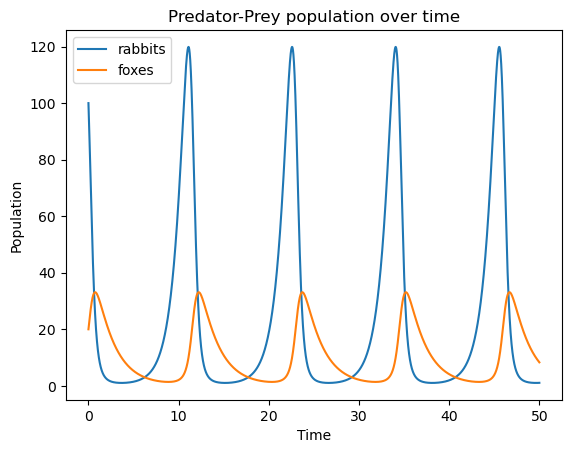

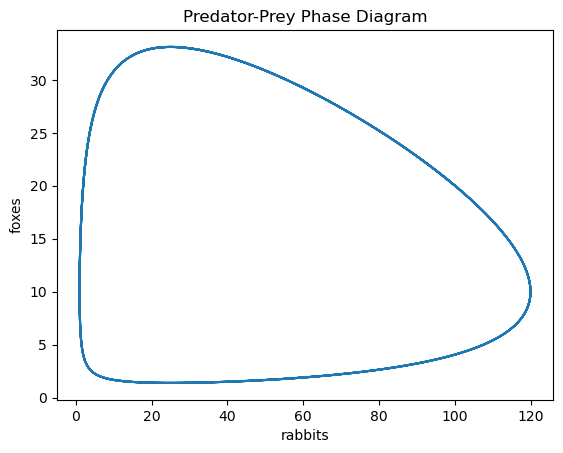

In [40]:
plot_predator_prey_model()

We can see that whenever there is a surplus of prey the number of predator quickly increases, however, as soon as the predators increase up to a certain threshold the prey count quickly plummets which causes the predators to lose their food access and thus their own population plummets. On the phase diagram we can see a closed loop function which further solidifies the idea that both species have impact on each other.  
A curious case is the so called steady states of the population, which occur when $\frac{dx}{dt} = 0$ and $ \frac{dy}{dt} = 0$, meaning there is no change in population.

$$ x(\alpha - \beta y) = 0 $$
$$ y(-\gamma - \delta x) = 0 $$

We can conclude that steady states occur when
- $x = 0$ and $ y=0 $: No population, no change
- $x = \frac{\gamma}{\delta}$ and $y = \frac{\alpha}{\beta}$ 

If we input these values as initial conditions then our populations stay constant.

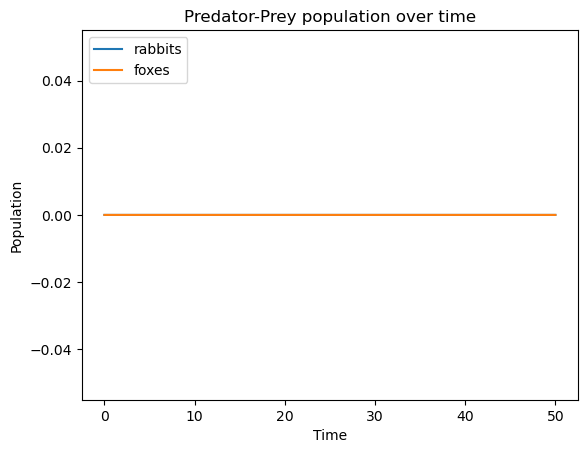

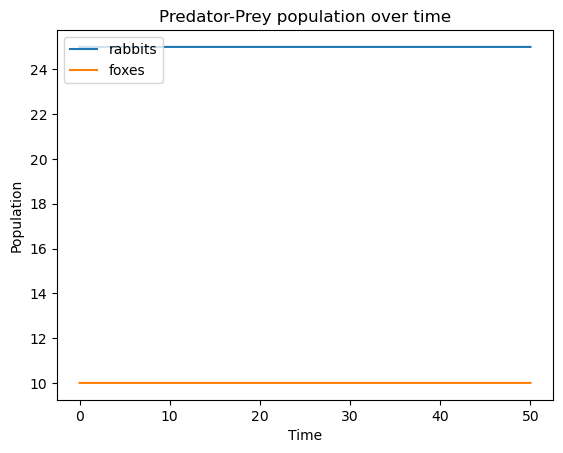

In [9]:
plot_predator_prey_model(initial_prey = 0, initial_predator = 0, phase_diagram = False)

alpha = 1
beta = 0.1
gamma = 0.5 
delta = 0.02
plot_predator_prey_model(initial_prey = gamma / delta, initial_predator = alpha/beta, phase_diagram = False)

# 4. Partial Differential Equations

### Introduction
 Partial Differential Equations(PDEs) are more complex than ODEs as they include multi-variable functions. As it is with differential equations these functions will be the unknowns and of course we will be looking for a function as our solution. PDEs are useful, however, they are notorious for being hard to solve, in fact most PDEs do not have analytical solutions. 

 ### The heat equation
 The heat equation is a very well-know PDE as it is a great example of complexity and practicality as well as being fairly easy to solve. The heat equation has several dimensions to it as it can be in a rod (1D), plate(2D), a cube(3D) and even beyond that. Let's begin by looking at the one dimensional model first.

 $$ \frac{\partial u}{\partial t} = k \frac{\partial^2 u}{\partial^2 t} $$   

 In this case 

# 5. Conclusion
Differential equations are essential when it comes to modeling the world around us through math. With their help we are able to run simulations of nearly everything in the real world with whatever parameters we would like, creating and accounting for every scenario imaginable. Differential Equations generally speaking are a very broad and deep topic which can be expanded upon nearly endlessly, however, some classes of differential equations are much more general, popular and useful compared to others as they could be very niche and have limited usability.   

## Bibliography
1. An Introduction to Differential Equations by James C. Robinson

## References
1. [BYJU'S](https://byjus.com/maths/differential-equation/)
2. [Differential Equations Wikipedia](https://en.wikipedia.org/wiki/Differential_equation)
3. [Ordinary Differential Equations  BYJUS](https://byjus.com/maths/ordinary-differential-equations/)
4. [Partial Differential Equations BYJUS](https://byjus.com/maths/partial-differential-equation/)
5. [Applications of Partial Differential Equations in Engineering field](https://www.linkedin.com/pulse/applications-partial-differential-equations-field-geetha-muthu)
6. [Slope Field Wikipedia](https://en.wikipedia.org/wiki/Slope_field)
7. [Paul's Online Notes Separable Differential Equations](https://tutorial.math.lamar.edu/Classes/DE/Separable.aspx)
8. [Direction Field Medium](https://medium.com/@olutosinbanjo/how-to-plot-a-direction-field-with-python-1fd022e2d8f8)
9. [Paul's Online Notes Linear Differential Equations](https://tutorial.math.lamar.edu/Classes/DE/Linear.aspx)
10. [BYUJ'S Integrating Factor](https://byjus.com/maths/integrating-factor/)
11. [Bernoulli Differential Equations Wikipedia](https://en.wikipedia.org/wiki/Bernoulli_differential_equation)
12. [Paul's Online Notes Second Order Concepts](https://tutorial.math.lamar.edu/Classes/DE/SecondOrderConcepts.aspx)
13. [Superposition Principle Wikipedia](https://en.wikipedia.org/wiki/Superposition_principle)
14. [University of Alabama in Huntsville Reduction of Order](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.uah.edu/images/people/faculty/howellkb/DEText-Ch13.pdf)
15. [Paul's Online Notes Linear Non-Homogeneous Second Order](https://tutorial.math.lamar.edu/Classes/DE/NonhomogeneousDE.aspx)
16. [Paul's Online Notes System of Differential Equations](https://tutorial.math.lamar.edu/Classes/DE/SystemsDE.aspx)
17. [Matrix System of Differential Equations Video by Steven Brunton](https://www.youtube.com/watch?v=Vtijyyo5fKI&t=3s)
18. [Aleksandar Haber Phase Portraits](https://aleksandarhaber.com/phase-portraits-of-state-space-models-and-differential-equations-in-python/)
19. [Oscillation Theory Wikipedia](https://en.wikipedia.org/wiki/Oscillation_theory)
20. [Understanding Oscillators](https://medium.com/analytics-vidhya/understanding-oscillators-python-2813ec38781d)
21. [Hooke's Law of Elasticity Wikipedia](https://en.wikipedia.org/wiki/Hooke%27s_law)
22. [Paul's Online Notes Mechanical Vibrations](https://tutorial.math.lamar.edu/Classes/DE/Vibrations.aspx)
23. [INASIC Predator-Prey](https://github.com/INASIC/predator-prey_systems/blob/master/Modelling%20Predator-Prey%20Systems%20in%20Python.ipynb)
24. [Meduim Simulating Predator-Prey Models in Python](https://medium.com/@errazkim/simulating-predator-prey-models-630f96607491)
25. [Predators and Prey - Numberphile](https://www.youtube.com/watch?v=M0nRWcF1WJw)
26. [Lotka-Volterra equations Wikipiedia](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)
27. [Mike Saint-Antoine Predator-Prey Python Code](https://github.com/mikesaint-antoine/Comp_Bio_Tutorials/blob/main/more_comp_bio/predator-prey.py)